## Задание 2.1
<font size="4">Выбрать значение шага дискретизации в пределах от 5 до 15. Продискретизировать с этим шагом дискретизации изображение и вывести его на экран.

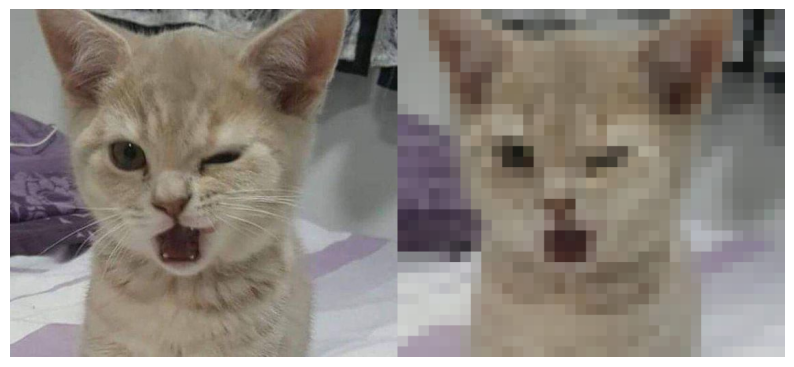

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('catsy.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = image.copy()

K = 15
s = img.shape

h1, w1 = s[0], s[1]
h = (s[0] - s[0] % K)
w = (s[1] - s[1] % K)

img = cv2.resize(img, (w, h))

for y in range(0, h-1, K):
    for x in range(0, w-1, K):
        if len(s) > 2:
            s = np.average(img[y:(y + K), x:(x + K)], axis=0)
            img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
        else:
            s = img[y:(y+K), x:(x+K)]
            img[y:(y+K), x:(x+K)] = np.average(s)
            
img = cv2.resize(img, (w1, h1))
res = np.hstack((image, img))
plt.figure(figsize=(10, 20))
plt.axis("off")
plt.imshow(res)

## Задание 2.2
<font size="4">Проквантовать изображение, сократив число градаций до 4

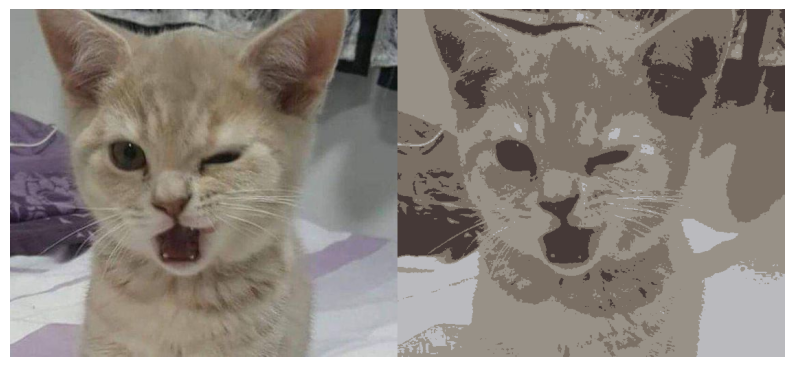

In [3]:
img = cv2.imread('catsy.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Z = img.reshape((-1, 3))
Z = np.float32(Z) 

crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 4
ret, label, center = cv2.kmeans(Z, k, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

result = np.hstack((img, res2))

plt.figure(figsize=(10, 20))
plt.axis("off")
plt.imshow(result)